## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
sns.set()

## Loading the Dataset

In [2]:
df = pd.read_csv('USA_housing.csv')

## Data Understanding

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

In [5]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [6]:
df.corr(method='pearson')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [7]:
df.skew()

Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64

In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Exploring the PDF's

[Text(0.5, 1.0, 'PDF of Avg. Area Income')]

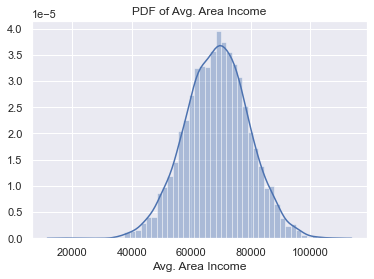

In [9]:
sns.distplot(df['Avg. Area Income']).set(title='PDF of Avg. Area Income')

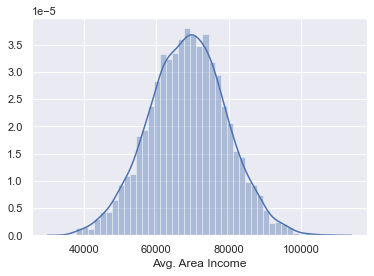

In [10]:
q = df['Avg. Area Income'].quantile(0.001)
data = df[df['Avg. Area Income']>q]
sns.distplot(data['Avg. Area Income'])

[Text(0.5, 1.0, 'PDF of Avg. Area House Age')]

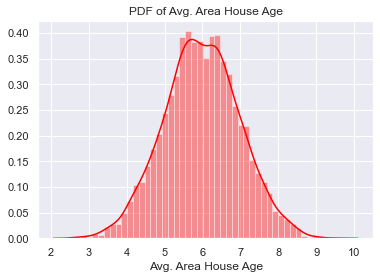

In [11]:
sns.distplot(data['Avg. Area House Age'], color='red').set(title='PDF of Avg. Area House Age')

[Text(0.5, 1.0, 'PDF of Avg. Area Number of Rooms')]

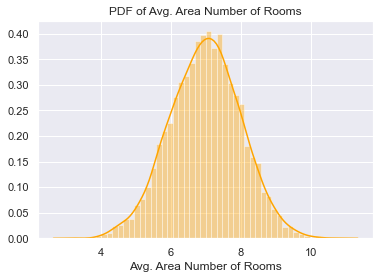

In [12]:
sns.distplot(data['Avg. Area Number of Rooms'], color='Orange').set(title='PDF of Avg. Area Number of Rooms')

[Text(0.5, 1.0, 'PDF of Area Population')]

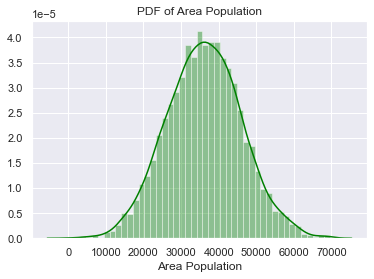

In [13]:
sns.distplot(data['Area Population'], color='green').set(title='PDF of Area Population')

All graphs above have small outliers data but these can still use because these are not significant.

In [14]:
data_clean = data.reset_index(drop=True)
data_clean.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4.995000e+03
mean,68619.604391,5.977655,6.987455,3.980985,36164.298022,1.232851e+06
std,10598.250498,0.991005,1.005938,1.233976,9918.788082,3.522843e+05
min,36100.444227,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61489.397788,5.322350,6.299156,3.140000,29409.079129,9.984714e+05
50%,68814.925607,5.970953,7.002864,4.050000,36200.372388,1.232993e+06
75%,75788.417191,6.650499,7.665388,4.490000,42852.508761,1.471765e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## EDA

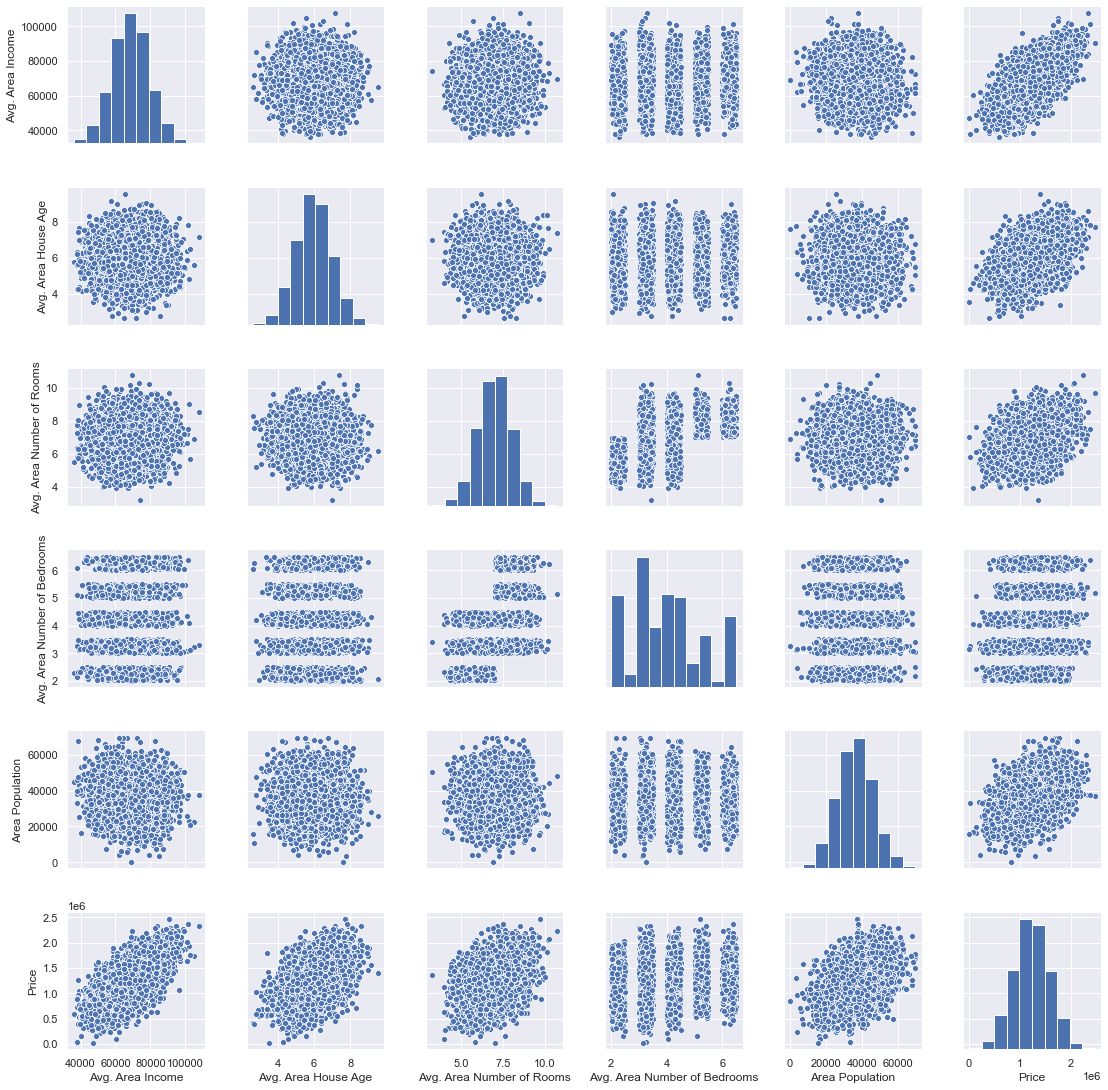

In [15]:
sns.pairplot(data_clean)

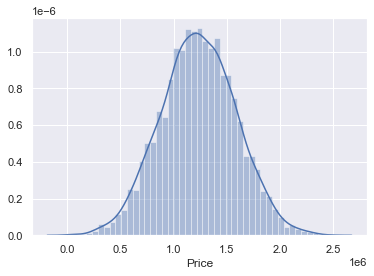

In [16]:
sns.distplot(data_clean['Price'])

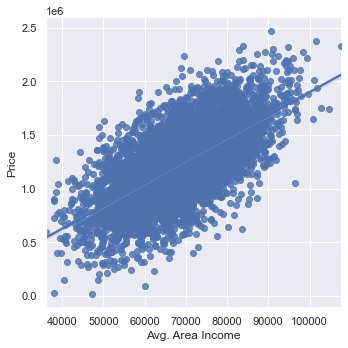

In [17]:
sns.lmplot(x='Avg. Area Income', y='Price', data=data_clean)

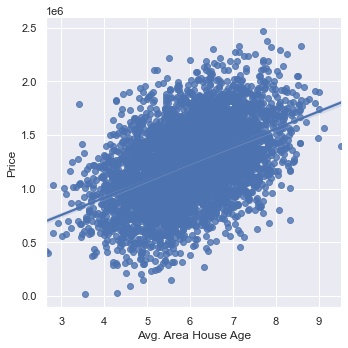

In [18]:
sns.lmplot(x='Avg. Area House Age', y='Price', data=data_clean)

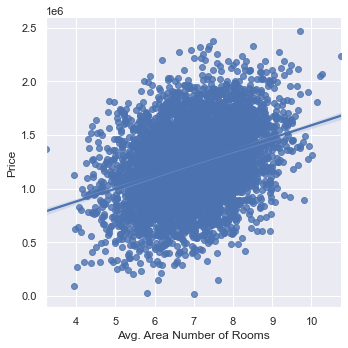

In [19]:
sns.lmplot(x='Avg. Area Number of Rooms', y='Price', data=data_clean)

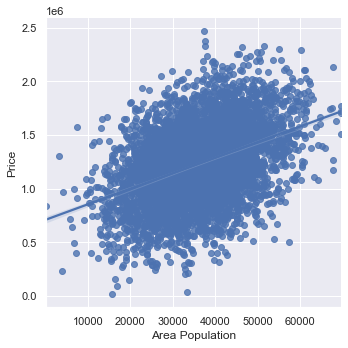

In [20]:
sns.lmplot(x='Area Population', y='Price', data=data_clean)

([<matplotlib.axis.XTick at 0x2a71e2e8790>,
 <a list of 6 Text major ticklabel objects>)

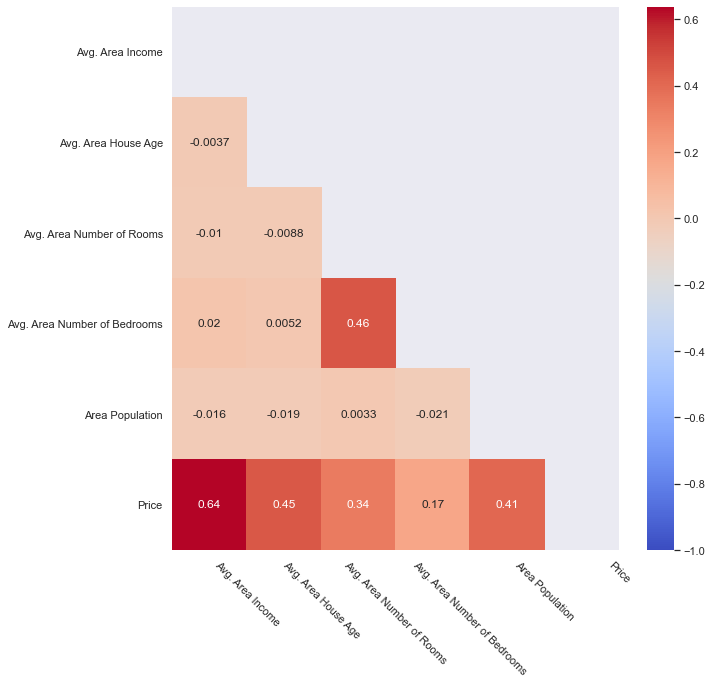

In [21]:
corr = data_clean.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask)
plt.xticks(np.arange(1, 7, step=1), rotation=-45)

In [22]:
data_cleaned = data_clean.drop(['Address'], axis=1)
data_cleaned.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## Linear Regression Model

In [23]:
x = data_cleaned.drop(['Price'], axis=1)
y = data_cleaned['Price']

### Train Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=101)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (4245, 5) (4245,)
Test set:  (750, 5) (750,)


### Creating and Training Model

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Train Data

In [26]:
lr_pred = lr.predict(x_train)

(-100000.0, 2500000.0)

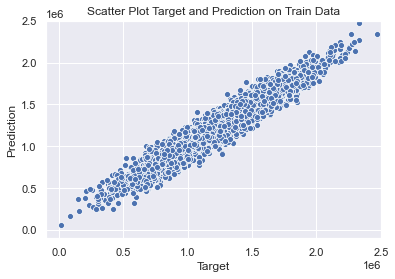

In [27]:
sns.scatterplot(y_train, lr_pred).set(title='Scatter Plot Target and Prediction on Train Data', xlabel='Target', ylabel='Prediction')
plt.xlim(-100000,2500000)
plt.ylim(-100000,2500000)

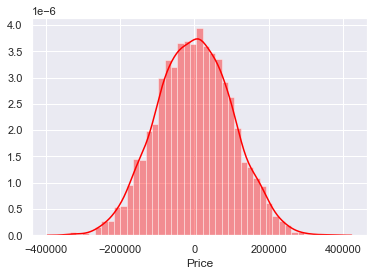

In [28]:
residual_train = y_train - lr_pred
sns.distplot(residual_train, color='red')

### Model Evaluation
#### Finding std, bias, and weight

In [29]:
lr.score(x_train, y_train)

0.917644033522531

In [30]:
# intercept or bias
lr.intercept_

-2638134.7452794397

In [31]:
# Slope or Weight
lr.coef_

array([2.15736983e+01, 1.65788042e+05, 1.20333622e+05, 2.14571176e+03,
       1.51935176e+01])

In [32]:
train_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
train_summary['Weight'] = lr.coef_
train_summary

,Features,Weight
0,Avg. Area Income,21.573698
1,Avg. Area House Age,165788.042403
2,Avg. Area Number of Rooms,120333.622476
3,Avg. Area Number of Bedrooms,2145.711764
4,Area Population,15.193518


#### Test Data

In [33]:
lr_pred_test = lr.predict(x_test)

(0.0, 2600000.0)

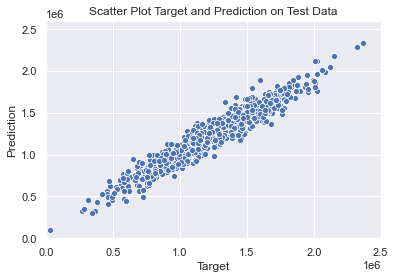

In [34]:
sns.scatterplot(y_test, lr_pred_test).set(title='Scatter Plot Target and Prediction on Test Data', xlabel='Target', ylabel='Prediction')
plt.xlim(0,2500000)
plt.ylim(0,2600000)

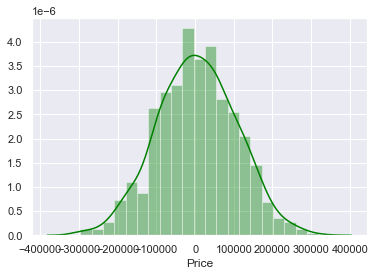

In [35]:
residual_test = y_test - lr_pred_test
sns.distplot(residual_test, color='green')

## Regression Evaluation Metrics

In [36]:
pd.set_option('precision',3)
r2 = r2_score(y_test, lr_pred_test)
mae = mean_absolute_error(y_test, lr_pred_test)
mse = mean_squared_error(y_test, lr_pred_test)

In [37]:
result = pd.DataFrame(index=['R2 Score','Mean Absolute Error','Mean Squared Error'], columns=['Values'], data=[r2,mae,mse])
result

,Values
R2 Score,9.179e-01
Mean Absolute Error,8.140e+04
Mean Squared Error,1.031e+10
